In [1]:
from spectral import *
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (20,10)

In [3]:
file = "D:\\Documents\\UPN 2019-2\\Tesis\\Data\\hypercube_01.hdr"

In [4]:
img = open_image(file)

In [5]:
img.shape

(1250, 1600, 150)

In [6]:
TRUE_COLOR = (80,69,57)
# TRUE_COLOR = (58,34,19)

Text(0.5, 1.0, 'Imagen Hiperespectral RGB (Bandas 80 ,69 y 57)')

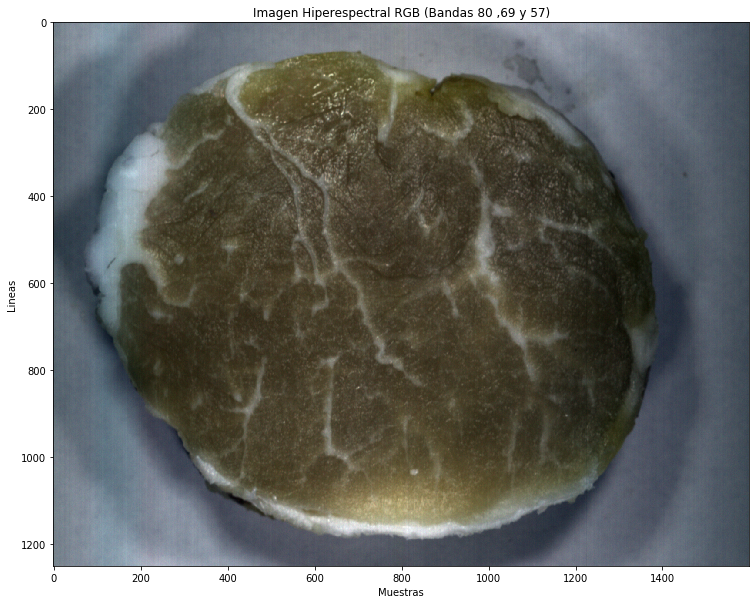

In [10]:
view = imshow(img, bands=TRUE_COLOR)
plt.xlabel('Muestras')
plt.ylabel('Lineas')
plt.title('Imagen Hiperespectral RGB (Bandas 80 ,69 y 57)')

In [148]:
# Seleccionamos la imagen recortada para abarcar solo la muestra y el rango de longitud de onda 400 - 1000 nm
img_subset = img.read_subimage(range(95,1150), range(95,1380), range(50,126))

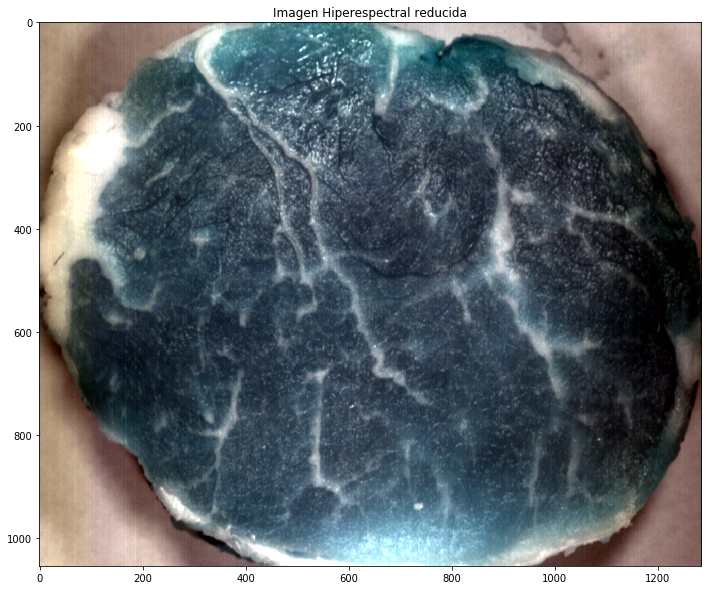

In [12]:
view = imshow(img_subset,bands=(10,20,30),stretch=0.01,title="Imagen Hiperespectral reducida")

# K-means Clustering

In [176]:
(m, c) = kmeans(img_subset, 20, 50)

Initializing clusters along diagonal of N-dimensional bounding box.
Iteration 1...  0.Iteration 1...1355646 pixels reassigned.
Iteration 2...  0.Iteration 2...143272 pixels reassigned.
Iteration 3...  0.Iteration 3...94129 pixels reassigned.
Iteration 4...  0.Iteration 4...122495 pixels reassigned.
Iteration 5...  0.Iteration 5...84104 pixels reassigned.
Iteration 6...  0.Iteration 6...60374 pixels reassigned.
Iteration 7...  0.Iteration 7...53452 pixels reassigned.
Iteration 8...  0.Iteration 8...51445 pixels reassigned.
Iteration 9...  0.Iteration 9...50058 pixels reassigned.
Iteration 10...  0.0Iteration 10...48849 pixels reassigned.
Iteration 11...  0.0Iteration 11...47594 pixels reassigned.
Iteration 12...  0.0Iteration 12...46695 pixels reassigned.
Iteration 13...  0.0Iteration 13...46074 pixels reassigned.
Iteration 14...  0.0Iteration 14...44885 pixels reassigned.
Iteration 15...  0.0Iteration 15...43907 pixels reassigned.
Iteration 16...  0.0Iteration 16...43653 pixels reassig

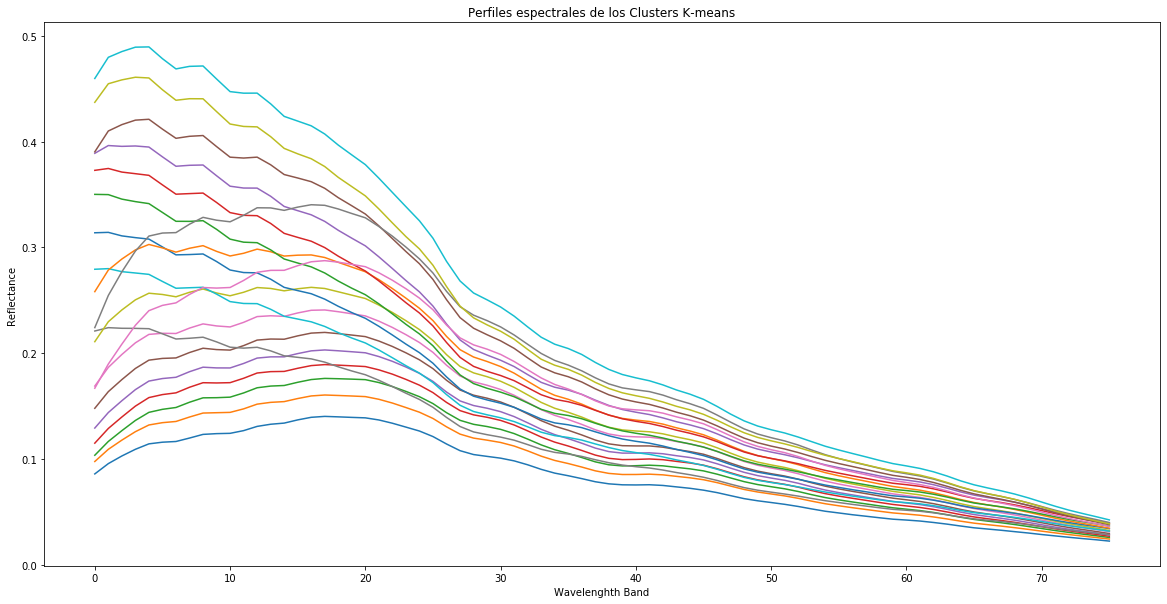

In [177]:
plt.xlabel('Wavelenghth Band')
plt.ylabel('Reflectance')
plt.title('Perfiles espectrales de los Clusters K-means')
for i in range(c.shape[0]):
    plt.plot(c[i])
plt.show()

<bound method ImageView.show_data of ImageView object:
  Display bands       :  (30, 19, 7)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.09638039431117622, 0.2252945126045291]
    G: [0.13379722883476775, 0.3487151315387902]
    B: [0.1138985533785021, 0.4178721845815785]
>

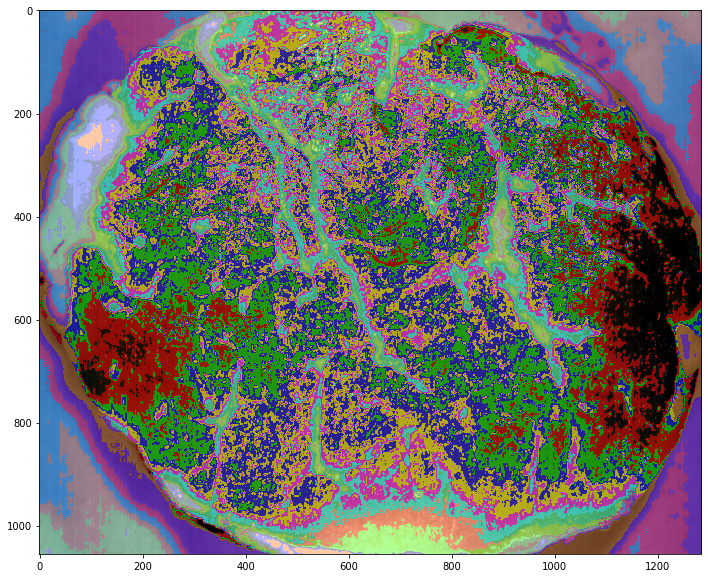

In [185]:
view = imshow(img_subset, bands=(30,19,7),stretch=0.01, classes=m)
view.set_display_mode('overlay')
view.class_alpha = 0.5
view.show_data

In [183]:
m.shape

(1055, 1285)

In [186]:
len(view.classes)

1055

# Clasificación Supervisada

## Datos de Entrenamiento

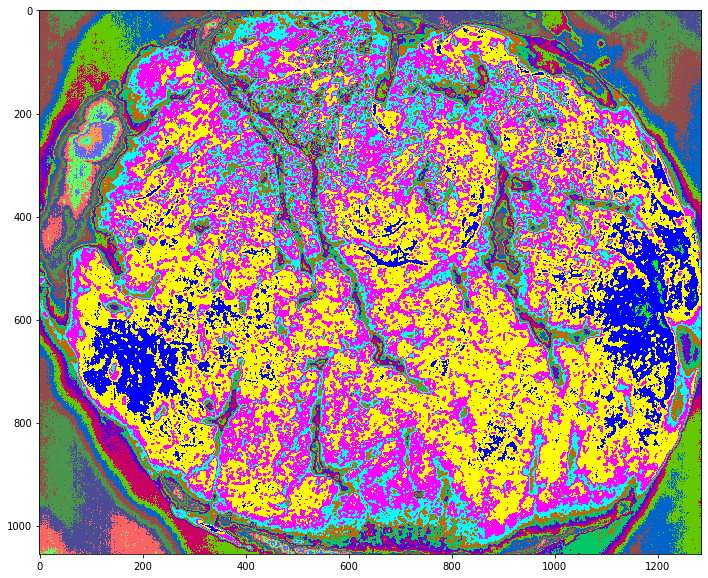

In [156]:
gt = img_subset[:,:,1]
v = imshow(classes=gt)

In [174]:
len(v.class_colors)

39

In [162]:
clmap_training = img_subset[:,:,45] * (gt != 0)

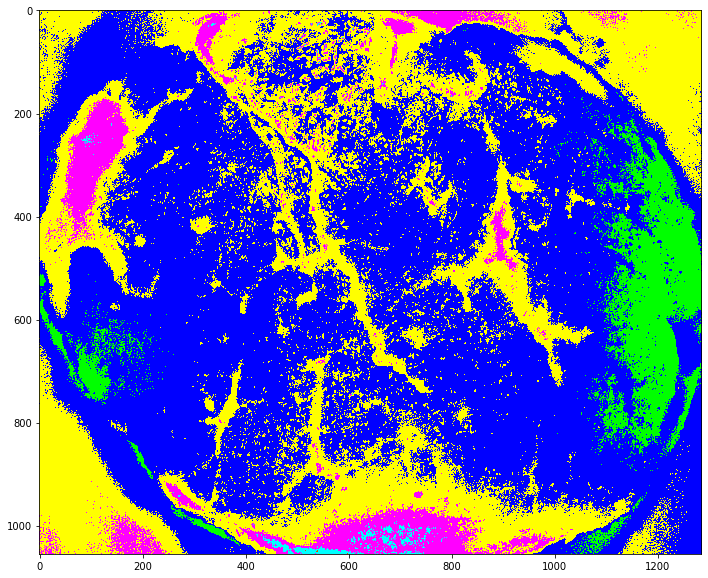

In [163]:
v = imshow(classes=clmap_training)

In [51]:
classes = create_training_classes(img_subset, gt)

# Análisis de Componentes Principales

In [29]:
pc = principal_components(img_subset)

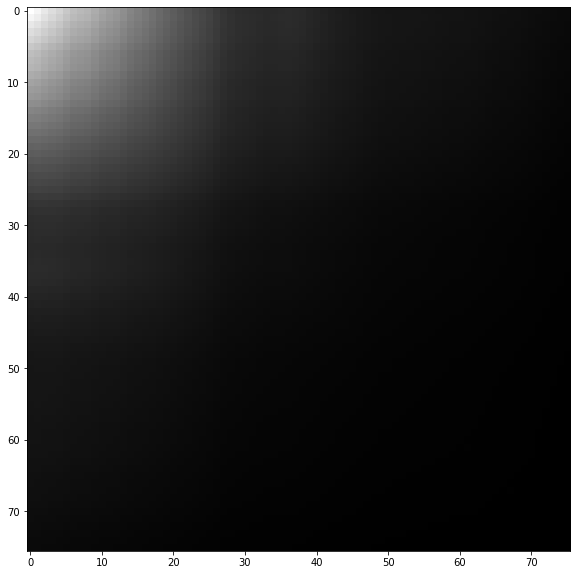

In [9]:
v = imshow(pc.cov)

In [11]:
pc_0999 = pc.reduce(fraction=0.999)

In [12]:
len(pc_0999.eigenvalues)

45

In [58]:
len(pc_0999.eigenvectors)

76

In [14]:
img_pc = pc_0999.transform(img_subset)

In [68]:
img_pc.shape

(1055, 1285, 45)

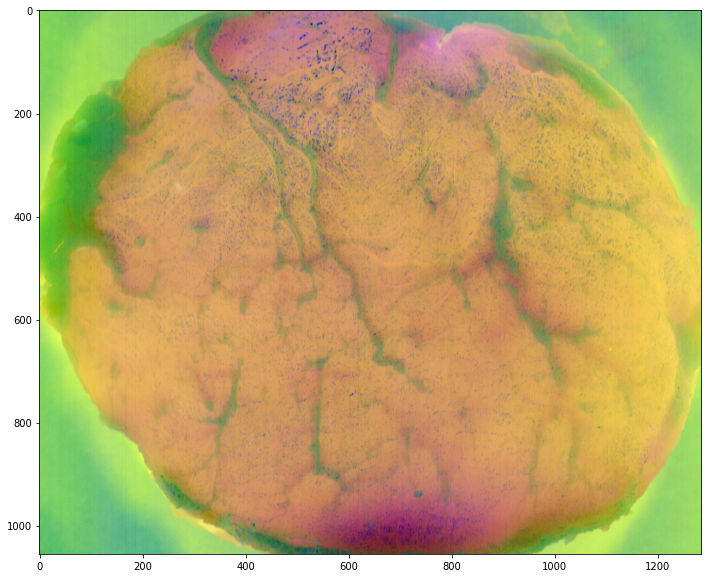

In [149]:
v = imshow(img_pc[:,:,:3], stretch_all=True)

In [150]:
gt = img_subset[:,:,46]

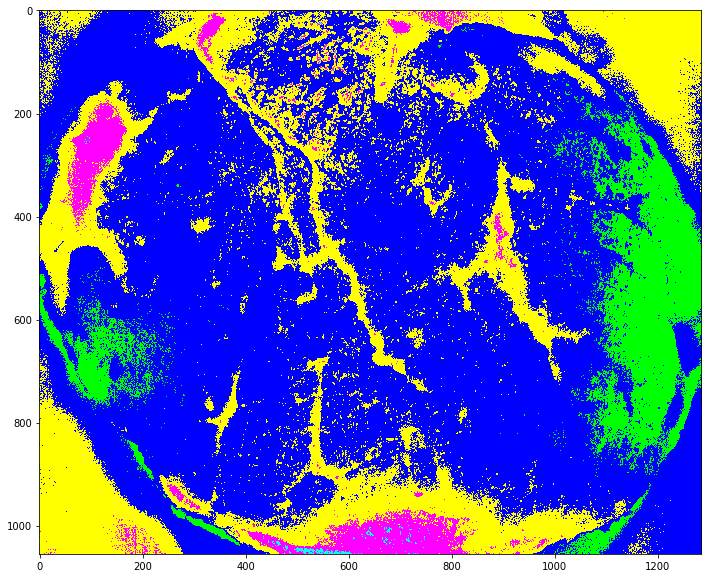

In [151]:
v = imshow(classes=gt)

In [96]:
classes = create_training_classes(img_pc, gt)

In [97]:
gmlc = GaussianClassifier(classes)

Setting min samples to 45
  Omitting class   0 : only 24 samples present
  Omitting class   0 : only 12 samples present
  Omitting class   0 : only 1 samples present
  Omitting class   0 : only 1 samples present
  Omitting class   0 : only 8 samples present
  Omitting class   0 : only 22 samples present
  Omitting class   0 : only 25 samples present
  Omitting class   0 : only 32 samples present
  Omitting class   0 : only 10 samples present
  Omitting class   0 : only 11 samples present
  Omitting class   0 : only 15 samples present
  Omitting class   0 : only 18 samples present
  Omitting class   0 : only 12 samples present
  Omitting class   0 : only 2 samples present
  Omitting class   0 : only 3 samples present
  Omitting class   0 : only 1 samples present
  Omitting class   0 : only 7 samples present
  Omitting class   0 : only 1 samples present
  Omitting class   0 : only 10 samples present
  Omitting class   0 : only 7 samples present
  Omitting class   0 : only 4 samples prese

  Omitting class   0 : only 3 samples present
  Omitting class   0 : only 15 samples present
  Omitting class   0 : only 18 samples present
  Omitting class   0 : only 18 samples present
  Omitting class   0 : only 2 samples present
  Omitting class   0 : only 8 samples present
  Omitting class   0 : only 7 samples present
  Omitting class   0 : only 1 samples present
  Omitting class   0 : only 11 samples present
  Omitting class   0 : only 25 samples present
  Omitting class   0 : only 34 samples present
  Omitting class   0 : only 15 samples present
  Omitting class   0 : only 2 samples present
  Omitting class   0 : only 2 samples present
  Omitting class   0 : only 9 samples present
  Omitting class   0 : only 11 samples present
  Omitting class   0 : only 9 samples present
  Omitting class   0 : only 2 samples present
  Omitting class   0 : only 6 samples present
  Omitting class   0 : only 13 samples present
  Omitting class   0 : only 22 samples present
  Omitting class   0 : o

  Omitting class   0 : only 7 samples present
  Omitting class   0 : only 41 samples present
  Omitting class   0 : only 3 samples present
  Omitting class   0 : only 4 samples present
  Omitting class   0 : only 3 samples present
  Omitting class   0 : only 16 samples present
  Omitting class   0 : only 21 samples present
  Omitting class   0 : only 1 samples present
  Omitting class   0 : only 1 samples present
  Omitting class   0 : only 3 samples present
  Omitting class   0 : only 5 samples present
  Omitting class   0 : only 35 samples present
  Omitting class   0 : only 36 samples present
  Omitting class   0 : only 3 samples present
  Omitting class   0 : only 3 samples present
  Omitting class   0 : only 14 samples present
  Omitting class   0 : only 16 samples present
  Omitting class   0 : only 1 samples present
  Omitting class   0 : only 6 samples present
  Omitting class   0 : only 3 samples present
  Omitting class   0 : only 5 samples present
  Omitting class   0 : only

In [145]:
clmap = gmlc.classify_image(img_pc[:,:,:])

Processing...  0.0%

MemoryError: Unable to allocate array with shape (1355675, 1437) and data type float64

In [132]:
len(gmlc.classes)

1437

In [130]:
clmap_training = clmap * (gt != 0)

ValueError: operands could not be broadcast together with shapes (1055,10) (1055,1285) 

In [136]:
img_pc.shape

(1055, 1285, 45)

In [ ]:
v = imshow(classes=clmap_training)